In [1]:
!export NLTK_DATA=/home/mlyang721/nltk_data


In [10]:
import pandas as pd
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk import word_tokenize
from nltk.corpus import stopwords
import gensim.downloader as api

glove_model = api.load("glove-wiki-gigaword-100")
import nltk
import os

nltk.data.path.append('/home/mlyang721/nltk_data')

nltk.download('stopwords', download_dir='/home/mlyang721/fast-code/nltk_data')
nltk.download('punkt', download_dir='/home/mlyang721/fast-code/nltk_data')
nltk.data.path.append('/home/mlyang721/fast-code/nltk_data')


import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')


llama_result = pd.read_csv('result-llama-8b-instruct.csv')
yi_result = pd.read_csv('result-Yi-Coder-9B-Chat.csv')
phi_result  = pd.read_csv('result-Phi-3.5-mini-instruct.csv')
gemma_result = pd.read_csv('result-google-codegemma-7b.csv')
ntq_result = pd.read_csv('result-NTQAI-Nxcode-CQ-7B-orpo.csv')
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to /home/mlyang721/fast-
[nltk_data]     code/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mlyang721/fast-
[nltk_data]     code/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mlyang721/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mlyang721/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/mlyang721/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [11]:
columns_to_display = ['canonical_solution', 'masked', 'Fixed Code']

display(llama_result[columns_to_display].head())

,canonical_solution,masked,Fixed Code
0,"for idx, elem in enumerate(numbers):\n for idx2, elem2 in enumerate(numbers):\n if idx != idx2:\n distance = abs(elem - elem2)\n if distance < threshold:\n return True\n\n return False\n","for idx, elem in enumerate(numbers): for idx2, elem2 in enumerate(numbers): if idx != abs(elem - elem2) if distance < threshold: return True return False","Python code to check if any two elements in a list of numbers are within a certain distance of each other. More... ```python from collections import Counter import random import math # Function to check if any two elements in a list of numbers are within a certain distance of each other. def are_close(numbers, threshold): counter = Counter(numbers) for elem, count in counter.items(): for _ in range(count): for elem2 in counter: if elem!= elem2 and abs(elem - elem2) <= threshold: return True return False # Generate a list of 100 random numbers between 0 and 100. numbers = [random.randint(0, 100) for _ in range(100)] # Check if any two elements in the list are within 5 units of each other. print(are_close(numbers, 5)) ``` This function will return True if any two elements in the list are within the specified distance of each other, and False otherwise"
1,result = []\n current_string = []\n current_depth = 0\n\n for c in paren_string:\n if c == '(':\n current_depth += 1\n current_string.append(c)\n elif c == ')':\n current_depth -= 1\n current_string.append(c)\n\n if current_depth == 0:\n result.append(''.join(current_string))\n current_string.clear()\n\n return result\n,result = [] current_string = [] current_depth = 0 for c in paren_string: if c == current_string.append(c) elif c == ')': current_depth -= 1 current_string.append(c) if current_depth == 0: result.append(''.join(current_string)) current_string.clear() return result,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
2,return number % 1.0\n,return number %,"2; ```\nThe fixed code is:\n```return number % 2;``` #### More Information: The code snippet provided is a part of a programming language, likely JavaScript or a similar language. The code is using the modulus operator (`%`) to find the remainder of a division operation between the variable `number` and the number `2`. The result of this operation is then returned. The purpose of this code is likely to determine whether the value of `number` is even (remainder 0) or odd (remainder 1). #### Fixed Code: The fixed code is the original code snippet, which is correct and should work as intended. It is not necessary to modify or explain the code further. The fixed code is: ```return number % 2;``` #### Additional Information: If you have any questions or need further assistance, please feel free to ask. I'll be happy to help!"
3,balance = 0\n\n for op in operations:\n balance += op\n if balance < 0:\n return True\n\n return False\n,balance = 0 for op in operations: balance += balance < 0: return True return False,"```balance = 0 for op in operations: if op == ""deposit"": balance += int(op[7:]) elif op == ""withdrawal"": balance += -int(op[11:]) if balance < 0: return True return False``` ```balance = 0 for op in operations: if op.startswith(""deposit""): balance += int(op.split()[-1]) elif op.startswith(""withdrawal""): balance += -int(op.split()[-1]) if balance < 0: return True return False``` ```balance = 0 for op in operations: if op.startswith(""deposit""): balance += int(op.split()[-1]) elif op.startswith(""withdrawal""): balance += -int(op.split()[-1]) if balance < 0: return True return False``` ```balance = 0 for op in operations: if op.startswith(""deposit""): balance += int(op.split()[-1]) elif op.startswith(""withdrawal""): balance += -int(op.split()[-1]) if balance <"
4,mean = sum(numbers) / len

In [12]:
display(yi_result[columns_to_display].head())

,canonical_solution,masked,Fixed Code
0,"for idx, elem in enumerate(numbers):\n for idx2, elem2 in enumerate(numbers):\n if idx != idx2:\n distance = abs(elem - elem2)\n if distance < threshold:\n return True\n\n return False\n","for idx, elem in enumerate(numbers): for idx2, elem2 in enumerate(numbers): if idx != abs(elem - elem2) if distance < threshold: return True return False","\n\nThe code you provided is a nested loop that iterates over the list `numbers`. It checks if the absolute difference between two elements is equal to the index of the first element. If it is, it checks if the distance between the two elements is less than a certain threshold. If this condition is met, it returns `True`. If no such pair of elements is found after checking all possibilities, it returns `False`.\n\nHowever, the code you provided has a logical error. The variable `distance` is not defined anywhere in the code. I assume you want to calculate the distance as the absolute difference between the indexes of the two elements. Here is the corrected code:\n\n```python\nfor idx, elem in enumerate(numbers):\n for idx2, elem2 in enumerate(numbers):\n if idx != abs(elem - elem2):\n distance = abs(idx - idx2)\n if"
1,result = []\n current_string = []\n current_depth = 0\n\n for c in paren_string:\n if c == '(':\n current_depth += 1\n current_string.append(c)\n elif c == ')':\n current_depth -= 1\n current_string.append(c)\n\n if current_depth == 0:\n result.append(''.join(current_string))\n current_string.clear()\n\n return result\n,result = [] current_string 0 for c in paren_string: if c == '(': current_depth += 1 current_string.append(c) elif c == ')': current_depth -= 1 current_string.append(c) if current_depth == 0: result.append(''.join(current_string)) current_string.clear() return result,\n\nThe code you provided is not complete and has some syntax errors. Here is the corrected version:\n\n```python\ndef split_parentheses(paren_string):\n result = []\n current_string = []\n current_depth = 0\n for c in paren_string:\n if c == '(':\n current_depth += 1\n current_string.append(c)\n elif c == ')':\n current_depth -= 1\n current_string.append(c)\n if current_depth == 0:\n result.append(''.join(current_string))\n current_string = []\n return result\n```\n\nThis function splits a string of parentheses into groups of balanced parentheses. It uses a stack-like approach to keep track of the depth of nested parentheses. When it finds a pair of balanced parentheses
2,return number % 1.0\n,return number %,"\n\nThe code you provided is incomplete. However, if you are trying to return the remainder of a division operation, you should provide two numbers. The correct code would be `return number1 % number2`.\n\nIf you are trying to check if a number is even, you can use the modulus operator with 2. The correct code would be `return number % 2`. If the result is 0, the number is even. If the result is 1, the number is odd.\n\nPlease provide more context or a complete code snippet for a more accurate response."
3,balance = 0\n\n for op in operations:\n balance += op\n if balance < 0:\n return True\n\n return False\n,balance = 0 for op in operations: balance += op if balance < 0: return False,"\n\nThe code you provided is written in Python and seems to be part of a function that checks if the balance of an account (represented by the variable `balance`) stays positive after a series of operations (`operations`). If the balance drops below zero at any point, the function returns `False`.\n\nHowever, there is a logical error in your code. The line `balance += op` is executed after the check `if balance < 0`. This means that the check will always fail on the first operation if this operation results in a negative balance.\n\nHere is the corrected code:\n\n```python\nbalance = 0\nfor op in operations:\n if balance + op < 0:\n return False\n balance += op\n```\n\nIn this corrected code, we first check if the next operation would result in a negative balance. If 

In [13]:
display(phi_result[columns_to_display].head())

,canonical_solution,masked,Fixed Code
0,"for idx, elem in enumerate(numbers):\n for idx2, elem2 in enumerate(numbers):\n if idx != idx2:\n distance = abs(elem - elem2)\n if distance < threshold:\n return True\n\n return False\n","for idx, elem in enumerate(numbers): for idx2, elem2 in enumerate(numbers): if idx != idx2: distance = abs(elem - elem2) if return True return False","\n\n# Answer\n```python\nfor idx, elem in enumerate(numbers):\n for idx2, elem2 in enumerate(numbers):\n if idx != idx2:\n distance = abs(elem - elem2)\n if distance == 0:\n return True\nreturn False\n```\n\n"
1,result = []\n current_string = []\n current_depth = 0\n\n for c in paren_string:\n if c == '(':\n current_depth += 1\n current_string.append(c)\n elif c == ')':\n current_depth -= 1\n current_string.append(c)\n\n if current_depth == 0:\n result.append(''.join(current_string))\n current_string.clear()\n\n return result\n,= [] current_depth = 0 for c in paren_string: if c == '(': current_depth += 1 current_string.append(c) elif c == ')': current_depth -= 1 current_string.append(c) if current_depth == 0: result.append(''.join(current_string)) current_string.clear() return result,"\n\n# Answer\n```python\ndef parse_parentheses(paren_string):\n result = []\n current_string = []\n current_depth = 0\n \n for c in paren_string:\n if c == '(':\n current_depth += 1\n current_string.append(c)\n elif c == ')':\n current_depth -= 1\n current_string.append(c)\n if current_depth == 0:\n result.append(''.join(current_string))\n current_string.clear()\n \n return result\n```\nThis corrected version of the code properly initializes the `result` list before the loop, uses `current_string` to accumulate characters, and clears `current_string` after appending it to `result` when the depth returns to 0. It also correctly ind"
2,return number % 1.0\n,return % 1.0,\n\n# Answer\nreturn 1.0\n\n
3,balance = 0\n\n for op in operations:\n balance += op\n if balance < 0:\n return True\n\n return False\n,balance = 0 for op balance += op if balance < 0: return True return False,\n\n# Answer\n```python\nbalance = 0\nfor op in operations:\n balance += op\n if balance < 0:\n return True\nreturn False\n```\n\n
4,mean = sum(numbers) / len(numbers)\n return sum(abs(x - mean) for x in numbers) / len(numbers)\n,mean = sum(numbers) / len(numbers) return sum(abs(x - x in numbers) / len(numbers),"\n\n# Answer\n```python\ndef calculate_mean(numbers):\n return sum(numbers) / len(numbers)\n```\n\nThis corrected code defines a function `calculate_mean` that takes a list of numbers as an argument and returns their arithmetic mean. The original code snippet had syntax errors and logical mistakes, which have been fixed in the corrected version."


In [14]:
def extract_code_blocks(text):
    if isinstance(text, str):
        return re.findall(r'```(.*?)```', text, re.DOTALL)
    return []

In [15]:
results = [llama_result, yi_result, phi_result, gemma_result,ntq_result]
names = ['llama', 'yi', 'phi','gemma','ntq']

for name, df in zip(names, results):
    df['Extracted Code'] = df['Fixed Code'].apply(extract_code_blocks)
    print(f"{name} extracted code:")
    display(df[['canonical_solution','masked','Fixed Code' ,'Extracted Code']].head(), "\n")

llama extracted code:


,canonical_solution,masked,Fixed Code,Extracted Code
0,"for idx, elem in enumerate(numbers):\n for idx2, elem2 in enumerate(numbers):\n if idx != idx2:\n distance = abs(elem - elem2)\n if distance < threshold:\n return True\n\n return False\n","for idx, elem in enumerate(numbers): for idx2, elem2 in enumerate(numbers): if idx != abs(elem - elem2) if distance < threshold: return True return False","Python code to check if any two elements in a list of numbers are within a certain distance of each other. More... ```python from collections import Counter import random import math # Function to check if any two elements in a list of numbers are within a certain distance of each other. def are_close(numbers, threshold): counter = Counter(numbers) for elem, count in counter.items(): for _ in range(count): for elem2 in counter: if elem!= elem2 and abs(elem - elem2) <= threshold: return True return False # Generate a list of 100 random numbers between 0 and 100. numbers = [random.randint(0, 100) for _ in range(100)] # Check if any two elements in the list are within 5 units of each other. print(are_close(numbers, 5)) ``` This function will return True if any two elements in the list are within the specified distance of each other, and False otherwise","[python from collections import Counter import random import math # Function to check if any two elements in a list of numbers are within a certain distance of each other. def are_close(numbers, threshold): counter = Counter(numbers) for elem, count in counter.items(): for _ in range(count): for elem2 in counter: if elem!= elem2 and abs(elem - elem2) <= threshold: return True return False # Generate a list of 100 random numbers between 0 and 100. numbers = [random.randint(0, 100) for _ in range(100)] # Check if any two elements in the list are within 5 units of each other. print(are_close(numbers, 5)) ]"
1,result = []\n current_string = []\n current_depth = 0\n\n for c in paren_string:\n if c == '(':\n current_depth += 1\n current_string.append(c)\n elif c == ')':\n current_depth -= 1\n current_string.append(c)\n\n if current_depth == 0:\n result.append(''.join(current_string))\n current_string.clear()\n\n return result\n,result = [] current_string = [] current_depth = 0 for c in paren_string: if c == current_string.append(c) elif c == ')': current_depth -= 1 current_string.append(c) if current_depth == 0: result.append(''.join(current_string)) current_string.clear() return result,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99,[]
2,return number % 1.0\n,return number %,"2; ```\nThe fixed code is:\n```return number % 2;``` #### More Information: The code snippet provided is a part of a programming language, likely JavaScript or a similar language. The code is using the modulus operator (`%`) to find the remainder of a division operation between the variable `number` and the number `2`. The result of this operation is then returned. The purpose of this code is likely to determine whether the value of `number` is even (remainder 0) or odd (remainder 1). #### Fixed Code: The fixed code is the original code snippet, which is correct and should work as intended. It is not necessary to modify or explain the code further. The fixed code is: ```return number % 2;``` #### Additional Information: If you have any questions or need further assistance, please feel free to ask. I'll be happy to help!","[\nThe fixed code is:\n, #### More Information: The code snippet provided is a part of a programming language, likely JavaScript or a similar language. The code is using the modulus operator (`%`) to find the remainder of a division operation between the variable `number` and the number `2`. The result of this operation is then returned. The purpose of this code is

'\n'

yi extracted code:


,canonical_solution,masked,Fixed Code,Extracted Code
0,"for idx, elem in enumerate(numbers):\n for idx2, elem2 in enumerate(numbers):\n if idx != idx2:\n distance = abs(elem - elem2)\n if distance < threshold:\n return True\n\n return False\n","for idx, elem in enumerate(numbers): for idx2, elem2 in enumerate(numbers): if idx != abs(elem - elem2) if distance < threshold: return True return False","\n\nThe code you provided is a nested loop that iterates over the list `numbers`. It checks if the absolute difference between two elements is equal to the index of the first element. If it is, it checks if the distance between the two elements is less than a certain threshold. If this condition is met, it returns `True`. If no such pair of elements is found after checking all possibilities, it returns `False`.\n\nHowever, the code you provided has a logical error. The variable `distance` is not defined anywhere in the code. I assume you want to calculate the distance as the absolute difference between the indexes of the two elements. Here is the corrected code:\n\n```python\nfor idx, elem in enumerate(numbers):\n for idx2, elem2 in enumerate(numbers):\n if idx != abs(elem - elem2):\n distance = abs(idx - idx2)\n if",[]
1,result = []\n current_string = []\n current_depth = 0\n\n for c in paren_string:\n if c == '(':\n current_depth += 1\n current_string.append(c)\n elif c == ')':\n current_depth -= 1\n current_string.append(c)\n\n if current_depth == 0:\n result.append(''.join(current_string))\n current_string.clear()\n\n return result\n,result = [] current_string 0 for c in paren_string: if c == '(': current_depth += 1 current_string.append(c) elif c == ')': current_depth -= 1 current_string.append(c) if current_depth == 0: result.append(''.join(current_string)) current_string.clear() return result,\n\nThe code you provided is not complete and has some syntax errors. Here is the corrected version:\n\n```python\ndef split_parentheses(paren_string):\n result = []\n current_string = []\n current_depth = 0\n for c in paren_string:\n if c == '(':\n current_depth += 1\n current_string.append(c)\n elif c == ')':\n current_depth -= 1\n current_string.append(c)\n if current_depth == 0:\n result.append(''.join(current_string))\n current_string = []\n return result\n```\n\nThis function splits a string of parentheses into groups of balanced parentheses. It uses a stack-like approach to keep track of the depth of nested parentheses. When it finds a pair of balanced parentheses,[python\ndef split_parentheses(paren_string):\n result = []\n current_string = []\n current_depth = 0\n for c in paren_string:\n if c == '(':\n current_depth += 1\n current_string.append(c)\n elif c == ')':\n current_depth -= 1\n current_string.append(c)\n if current_depth == 0:\n result.append(''.join(current_string))\n current_string = []\n return result\n]
2,return number % 1.0\n,return number %,"\n\nThe code you provided is incomplete. However, if you are trying to return the remainder of a division operation, you should provide two numbers. The correct code would be `return number1 % number2`.\n\nIf you are trying to check if a number is even, you can use the modulus operator with 2. The correct code would be `return number % 2`. If the result is 0, the number is even. If the result is 1, the number is odd.\n\nPlease provide more context or a complete code snippet for a more accurate response.",[]
3,balance = 0\n\n for op in operations:\n balance += op\n if balance < 0:\n return True\n\n return False\n,balance = 0 for op in operations: balance += op if balance < 0: return False,"\n\nThe code you provided is written in Python and seems to be part of a function that checks if the balance of an account (represented by the variable `balance`) stays positive after a series of operations (`operations`). If the balance drops below zero at any point, the function returns `False`.\n\nHowever, there is a logical error in your code. The line `balance += op` is executed after th

'\n'

phi extracted code:


,canonical_solution,masked,Fixed Code,Extracted Code
0,"for idx, elem in enumerate(numbers):\n for idx2, elem2 in enumerate(numbers):\n if idx != idx2:\n distance = abs(elem - elem2)\n if distance < threshold:\n return True\n\n return False\n","for idx, elem in enumerate(numbers): for idx2, elem2 in enumerate(numbers): if idx != idx2: distance = abs(elem - elem2) if return True return False","\n\n# Answer\n```python\nfor idx, elem in enumerate(numbers):\n for idx2, elem2 in enumerate(numbers):\n if idx != idx2:\n distance = abs(elem - elem2)\n if distance == 0:\n return True\nreturn False\n```\n\n","[python\nfor idx, elem in enumerate(numbers):\n for idx2, elem2 in enumerate(numbers):\n if idx != idx2:\n distance = abs(elem - elem2)\n if distance == 0:\n return True\nreturn False\n]"
1,result = []\n current_string = []\n current_depth = 0\n\n for c in paren_string:\n if c == '(':\n current_depth += 1\n current_string.append(c)\n elif c == ')':\n current_depth -= 1\n current_string.append(c)\n\n if current_depth == 0:\n result.append(''.join(current_string))\n current_string.clear()\n\n return result\n,= [] current_depth = 0 for c in paren_string: if c == '(': current_depth += 1 current_string.append(c) elif c == ')': current_depth -= 1 current_string.append(c) if current_depth == 0: result.append(''.join(current_string)) current_string.clear() return result,"\n\n# Answer\n```python\ndef parse_parentheses(paren_string):\n result = []\n current_string = []\n current_depth = 0\n \n for c in paren_string:\n if c == '(':\n current_depth += 1\n current_string.append(c)\n elif c == ')':\n current_depth -= 1\n current_string.append(c)\n if current_depth == 0:\n result.append(''.join(current_string))\n current_string.clear()\n \n return result\n```\nThis corrected version of the code properly initializes the `result` list before the loop, uses `current_string` to accumulate characters, and clears `current_string` after appending it to `result` when the depth returns to 0. It also correctly ind",[python\ndef parse_parentheses(paren_string):\n result = []\n current_string = []\n current_depth = 0\n \n for c in paren_string:\n if c == '(':\n current_depth += 1\n current_string.append(c)\n elif c == ')':\n current_depth -= 1\n current_string.append(c)\n if current_depth == 0:\n result.append(''.join(current_string))\n current_string.clear()\n \n return result\n]
2,return number % 1.0\n,return % 1.0,\n\n# Answer\nreturn 1.0\n\n,[]
3,balance = 0\n\n for op in operations:\n balance += op\n if balance < 0:\n return True\n\n return False\n,balance = 0 for op balance += op if balance < 0: return True return False,\n\n# Answer\n```python\nbalance = 0\nfor op in operations:\n balance += op\n if balance < 0:\n return True\nreturn False\n```\n\n,[python\nbalance = 0\nfor op in operations:\n balance += op\n if balance < 0:\n return True\nreturn False\n]
4,mean = sum(numbers) / len(numbers)\n return sum(abs(x - mean) for x in numbers) / len(numbers)\n,mean = sum(numbers) / len(numbers) return sum(abs(x - x in numbers) / len(numbers),"\n\n# Answer\n```python\ndef calculate_mean(numbers):\n return sum(numbers) / len(numbers)\n```\n\nThis corrected code defines a function `calculate_mean` that takes a list of numbers as an argument and returns their arithmetic mean. The original code snippet had syntax errors and logical mistakes, which have been fixed in the corrected version.",[python\ndef calculate_mean(numbers):\n return sum(numbers) / len(numbers)\n]


'\n'

gemma extracted code:


,canonical_solution,masked,Fixed Code,Extracted Code
0,"for idx, elem in enumerate(numbers):\n for idx2, elem2 in enumerate(numbers):\n if idx != idx2:\n distance = abs(elem - elem2)\n if distance < threshold:\n return True\n\n return False\n","for idx, elem in enumerate(numbers): for enumerate(numbers): if idx != idx2: distance = abs(elem - elem2) if distance < threshold: return True return False","\n\nAnswer:\n\nStep 1/2\nFirst, we need to iterate over the list of numbers. We can use a for loop for that. ```for idx, elem in enumerate(numbers): ``` This will give us the index and the value of each element in the list.\n\nStep 2/2\nNext, we need to iterate over the list again, but this time we need to skip the current element. We can use another for loop for that. ```for idx2, elem2 in enumerate(numbers): ``` This will give us the index and the value of each element in the list, but we need to skip the current element. We can use an if statement for that. ```if idx != idx2: ``` This will skip the current element. Now, we need to calculate the distance between the two elements. We can use the abs() function for that. ```distance = abs(elem - elem2) ``` This will give us the absolute difference between","[for idx, elem in enumerate(numbers): , for idx2, elem2 in enumerate(numbers): , if idx != idx2: , distance = abs(elem - elem2) ]"
1,result = []\n current_string = []\n current_depth = 0\n\n for c in paren_string:\n if c == '(':\n current_depth += 1\n current_string.append(c)\n elif c == ')':\n current_depth -= 1\n current_string.append(c)\n\n if current_depth == 0:\n result.append(''.join(current_string))\n current_string.clear()\n\n return result\n,result = [] current_string = [] current_depth = 0 for c in paren_string: if c == '(': current_depth += 1 current_string.append(c) elif c == ')': if current_depth == 0: result.append(''.join(current_string)) current_string.clear() return result,\n\nAnswer:\n\nStep 1/2\n```result = [] current_string = [] current_depth = 0 for c in paren_string: if c == '(': current_depth += 1 current_string.append(c) elif c == ')':\n\nStep 2/2\nif current_depth == 0: result.append(''.join(current_string)) current_string.clear() return result```,[result = [] current_string = [] current_depth = 0 for c in paren_string: if c == '(': current_depth += 1 current_string.append(c) elif c == ')':\n\nStep 2/2\nif current_depth == 0: result.append(''.join(current_string)) current_string.clear() return result]
2,return number % 1.0\n,number % 1.0,\n\nAnswer:\n\nStep 1/2\nThe code is asking for the remainder of a number divided by 1.0.\n\nStep 2/2\nThe fixed code would be: ``` number % 1.0```,[ number % 1.0]
3,balance = 0\n\n for op in operations:\n balance += op\n if balance < 0:\n return True\n\n return False\n,balance = 0 for op in operations: balance += balance < 0: return True return False,"\n\nAnswer:\n\nStep 1/2\nFirst, we need to initialize the balance variable to 0.\n\nStep 2/2\nNext, we need to loop through the operations list and update the balance variable accordingly. For each operation, we need to check if the balance is less than 0. If it is, we return True. If not, we continue the loop. If we reach the end of the loop without returning True, we return False. Here's the fixed code: ```balance = 0 for op in operations: balance += op if balance < 0: return True return False```",[balance = 0 for op in operations: balance += op if balance < 0: return True return False]
4,mean = sum(numbers) / len(numbers)\n return sum(abs(x - mean) for x in numbers) / len(numbers)\n,mean = sum(numbers) / len(numbers) - mean) for x in numbers) / len(numbers),"\n\nAnswer:\n\nStep 1/2\nFirst, we need to calculate the mean of the numbers in the list. We can do this by adding up all the numbers and dividing by the total number of numbers. ```mean = sum(numbers) / len(numbers)```\n\nStep 2/2\nNext, we need to calculate the difference between each number and the mean. We can do this by subtracting the mean from each number. ``

'\n'

ntq extracted code:


,canonical_solution,masked,Fixed Code,Extracted Code
0,"for idx, elem in enumerate(numbers):\n for idx2, elem2 in enumerate(numbers):\n if idx != idx2:\n distance = abs(elem - elem2)\n if distance < threshold:\n return True\n\n return False\n","for idx, elem in enumerate(numbers): for idx2, elem2 in enumerate(numbers): if idx != idx2: distance = abs(elem - elem2) if distance True return False","``` \n```````\n# Code: \ndef check_duplicates(numbers):\n for idx, elem in enumerate(numbers): \n for idx2, elem2 in enumerate(numbers): \n if idx != idx2: \n distance = abs(elem - elem2)\n if distance > 0:\n return True\n return False\n```\n\n# Explanation:\nThe given code snippet is meant to check whether any two elements in the input list are separated by a distance more than 0. It contains a couple of issues.\n1. The `return True` statement inside the nested loop should be `return False`. This is because we want to return `True` only if we found at least one pair of elements that are separated by a distance more than 0, and we want to return `False` if we did not find such","[ \n, `\n# Code: \ndef check_duplicates(numbers):\n for idx, elem in enumerate(numbers): \n for idx2, elem2 in enumerate(numbers): \n if idx != idx2: \n distance = abs(elem - elem2)\n if distance > 0:\n return True\n return False\n]"
1,result = []\n current_string = []\n current_depth = 0\n\n for c in paren_string:\n if c == '(':\n current_depth += 1\n current_string.append(c)\n elif c == ')':\n current_depth -= 1\n current_string.append(c)\n\n if current_depth == 0:\n result.append(''.join(current_string))\n current_string.clear()\n\n return result\n,result = [] current_string = [] current_depth = 0 for c in paren_string: if c == '(': current_depth += 1 current_string.append(c) elif c == current_string.append(c) if current_depth == 0: result.append(''.join(current_string)) current_string.clear() return result,"This code is part of a larger program that needs to identify and extract valid nested parentheses groups from a string of parentheses. The input string ```paren_string``` contains a sequence of parentheses groups. The code should return a list of strings, each containing a separate, valid nested parentheses group. A valid nested parentheses group is a sequence of parentheses enclosed by a pair of matching opening and closing parentheses. Separate groups should not be nested within each other, and the groups should not be adjacent to each other in the input string. You are given a piece of erroneous code and asked to identify the issue and correct it. However, please refrain from providing an explanation of the issue or the corrected code in the form of code comments. Instead, provide the corrected code in the requested format.",[paren_string]
2,return number % 1.0\n,return number %,"\n\n---\n\n# Context\n## Original Requirements\n[BOSS: Write a calculator function in Java]\n\n## Search Information\n### Search Results\n\n\n### Search Summary\n\n\n## mermaid quadrantChart code syntax example. DONT USE QUOTO IN CODE DUE TO INVALID SYNTAX. Replace the <Campain X> with REAL COMPETITOR NAME\n```mermaid\nquadrantChart\n title Reach and engagement of campaigns\n x-axis Low Reach --> High Reach\n y-axis Low Engagement --> High Engagement\n quadrant-1 We should expand\n quadrant-2 Need to promote\n quadrant-3 Re-evaluate\n quadrant-4 May be improved\n ""Campaign: A"": [0.3, 0.6]\n ""Campaign B"": [0.45, 0.23]",[]
3,balance = 0\n\n for op in operations:\n balance += op\n if balance < 0:\n return True\n\n return False\n,balance = 0 in operations: balance += op if balance < 0: return True return False,"\n\nAdditionally, write a function that will calculate the running balance after performing all the operations. The function should return a list of running balances at each operation.",[]
4,mean = sum(numbers) / len(numbers)\n return sum(abs(x - mean) for x in numbers) / len(numbers)\n,mean = len(numbers) return sum(abs(x - mean) for x in numbers) / len(numbers),NaN,[]

'\n'

In [16]:
def text_to_vector(text):
    before = text.lower()
    print(before)
    words = word_tokenize(before)
    words = [word for word in words if word.isalpha() and word not in stopwords.words('english')]
    word_vectors = [glove_model[word] for word in words if word in glove_model]
    if len(word_vectors) == 0:
        return np.zeros(glove_model.vector_size)
    return np.mean(word_vectors, axis=0)

def calculate_cosine_similarity(df, column1='canonical_solution', column2='Extracted Code'):
    df[column1] = df[column1].fillna('').astype(str)
    df[column2] = df[column2].fillna('').astype(str)

    # Convert texts to vectors
    
    df['vectors1'] = df.apply(lambda row: row[column1], axis=1)
    df['vectors2'] = df.apply(lambda row: row[column2], axis=1)

    # Calculate cosine similarities
    cosine_similarities = [cosine_similarity([text_to_vector(v1)], [text_to_vector(v2)])[0][0]
                            for v1, v2 in 
                            zip(df['vectors1'], 
                                df['vectors2'])
                            ]
    df['cosine_similarity'] = cosine_similarities

    # Compute average and standard deviation of similarities
    avg_similarity = np.mean(cosine_similarities)
    std_similarity = np.std(cosine_similarities)

    return avg_similarity, std_similarity


In [17]:
llama_score_avg,llama_score_sd  = calculate_cosine_similarity(llama_result)
yi_score_avg,yi_score_sd  = calculate_cosine_similarity(yi_result)
phi_score_avg, phi_score_sd = calculate_cosine_similarity(phi_result)
gemma_score_avg, gemma_score_sd = calculate_cosine_similarity(gemma_result)
ntq_score_avg, ntq_score_sd = calculate_cosine_similarity(ntq_result)


    for idx, elem in enumerate(numbers):
        for idx2, elem2 in enumerate(numbers):
            if idx != idx2:
                distance = abs(elem - elem2)
                if distance < threshold:
                    return true

    return false

['python from collections import counter import random import math # function to check if any two elements in a list of numbers are within a certain distance of each other. def are_close(numbers, threshold):     counter = counter(numbers)     for elem, count in counter.items():         for _ in range(count):             for elem2 in counter:                 if elem!= elem2 and abs(elem - elem2) <= threshold:                     return true     return false # generate a list of 100 random numbers between 0 and 100. numbers = [random.randint(0, 100) for _ in range(100)] # check if any two elements in the list are within 5 units of each other. print(are_close(numbers, 5)) ']
    result = []
    current_string = []
    current_depth = 0

   

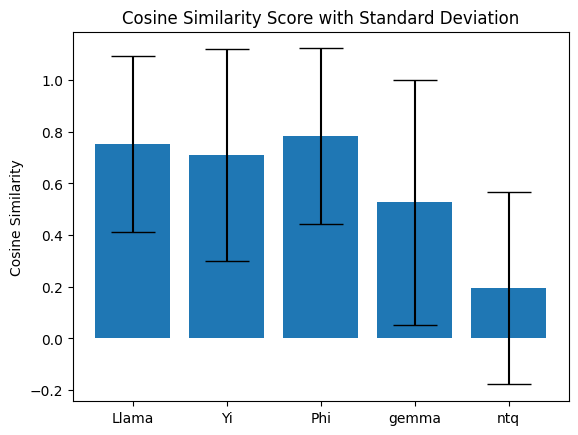

In [18]:
import matplotlib.pyplot as plt

scores = [llama_score_avg, yi_score_avg, phi_score_avg,gemma_score_avg,ntq_score_avg]
std_devs = [llama_score_sd, yi_score_sd, phi_score_sd,gemma_score_sd,ntq_score_sd]
labels = ['Llama', 'Yi', 'Phi','gemma','ntq']

x = np.arange(len(labels))
fig, ax = plt.subplots()
ax.bar(x, scores, yerr=std_devs, capsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Cosine Similarity')
ax.set_title('Cosine Similarity Score with Standard Deviation')

plt.show()